# Learning Rate Optimiser

In this notebook we are going to look at how we can optimise our learning rate. The goal is to find the optimal learning rate (the learning rate where the loss decreases the most during training). This was written at the time where I was working on improving the model found in my [Non Linear Binary Classification](https://github.com/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb) notebook.

1) We're going to take the model from the [Non Linear Binary Classification](https://github.com/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb) notebook as that is where this concept was introduced.

2) We're going to write a **callback function** that we can then inject into our "fit" function in our model.

3) Once we've made a Learning Rate Optimiser we'll then plot the results so we can see this in action.

The idea is we're going to write a function that is called at the beginning of each epoch during training. The information from this callback function will be saved in our "model_history" variable (that we populate while we're fitting the model) and once we've got the data we are going to plot the Loss vs the Learning Rate to find the learning rate value where the loss is decreasing the most.

In [51]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

### Getting and processing our data

In [52]:
# Declare number of samples
n_samples = 1000

# Create some samples
X, y = make_circles(n_samples, noise=0.03, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

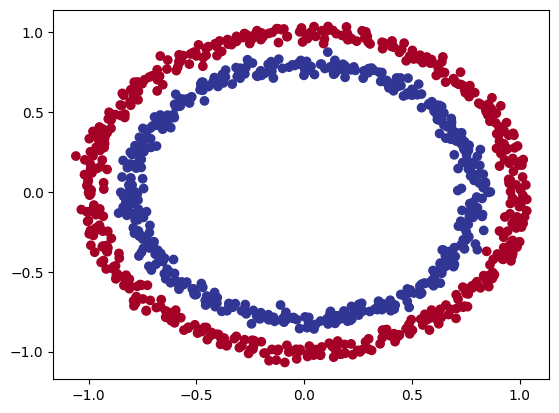

In [53]:
# Visualise the data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

### Creating our callback function

In [54]:
# This is where we declare our Callback function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

### Declaring our model

When we call the "fit" function we need to add our callback to it. In this next bit of code I fit the model twice so that we can see the difference beetween the two methods when we viaualise the results later on.

In [55]:
# This is the model from Non Linear Binary Classification
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(4, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification requires one output neuron
])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Fit the model the same way as before
model_history = model.fit(X_train, y_train, epochs=100, verbose=0) # Reduced the number of epochs from 100 to 25

# 3. Fit the model using callback
model_history_cb = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0) # Reduced the number of epochs from 100 to 25

# 4. Evaluate the model
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5093 - loss: 0.8739  


[0.8857980370521545, 0.5]

## Exploring the History Data

Now that we have some additional data (stored in "model_history") from our training we can inspect it to see what our ideal learning rate should be.

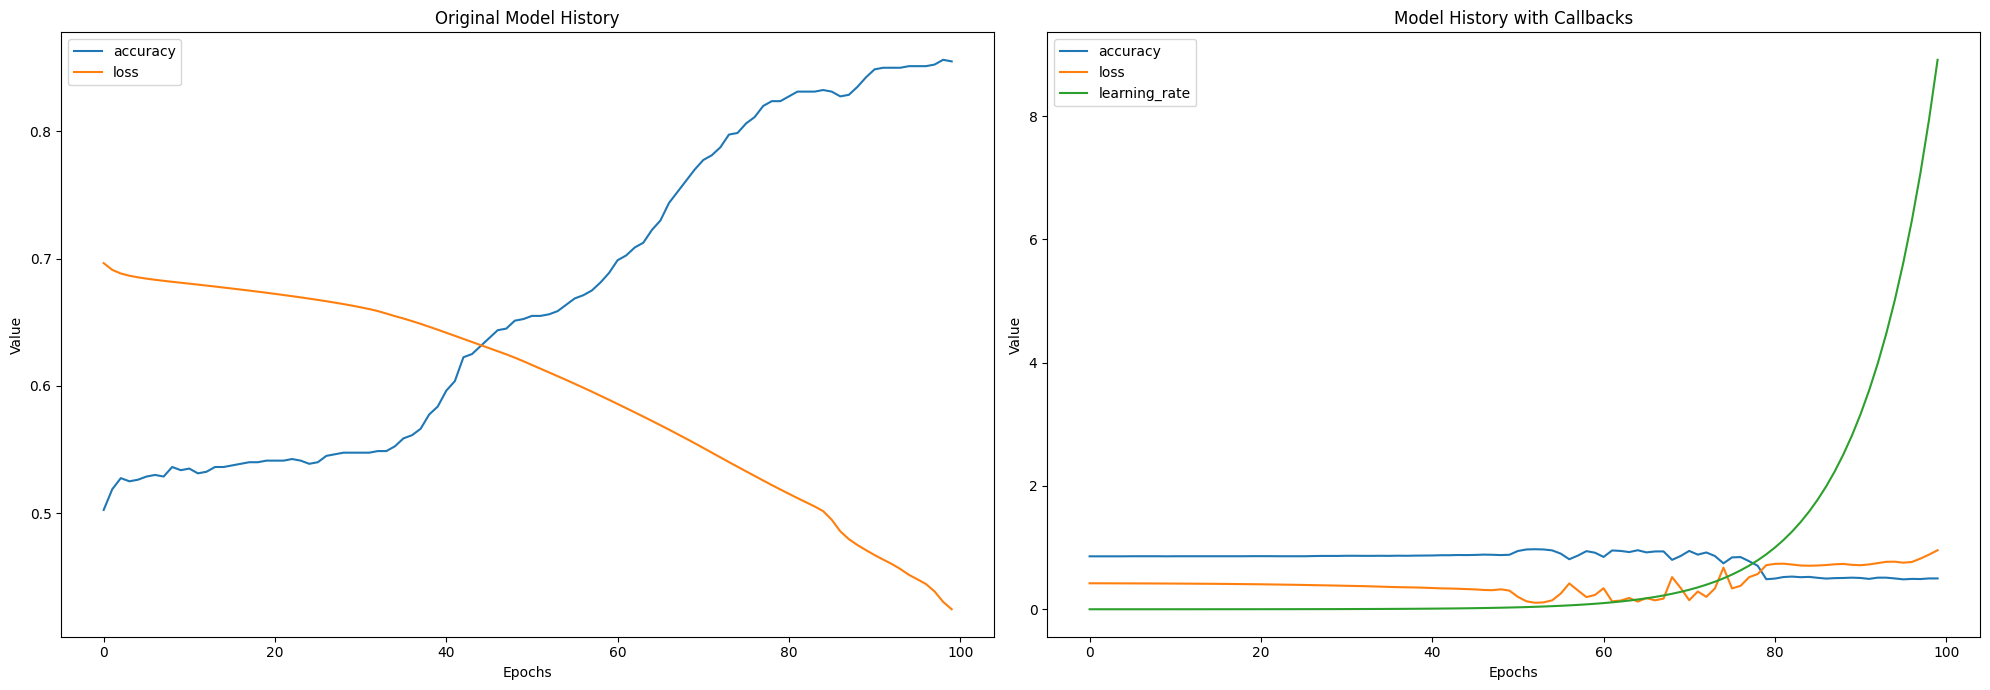

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  # Create a figure with two subplots side by side

# Plot for model_history
pd.DataFrame(model_history.history).plot(ax=axs[0], xlabel="Epochs", ylabel="Value")
axs[0].set_title('Original Model History')

# Plot for model_history_cb
pd.DataFrame(model_history_cb.history).plot(ax=axs[1], xlabel="Epochs", ylabel="Value")
axs[1].set_title('Model History with Callbacks')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Understanding the results
The graph (above) to the left is the original accuracy vs loss graph that we generated in [Non-Linear Binary Classification](https://github.com/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb) and the graph to the right is the plot that contains our callback function data.

The reason we have exponential growth (in the green line) is because of how we've declared our lr_scheduler callback i.e. 1e-4*<u>10**(epoch/20)</u>. As the index of the epochs increases, so does the exponent in our declared calculations.

## Plotting the learning rate vs loss
The "accuracy" plot is busying up our plot so the make the illustration clearer let's plot learning rate vs loss.

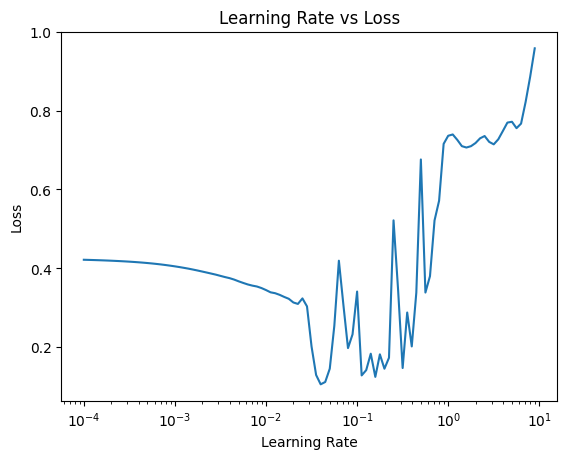

In [62]:
# First let's calculate our values for learning rates (when "epochs" is 100)
# The following line of code is our callback function that has been replicated.
learning_rates = 1e-4 * (10 ** (tf.range(100)/20))
plt.plot(figsize=(10,7))
plt.semilogx(learning_rates, model_history_cb.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()


Now that we have this data we need to find (on the graph above) where the Learning rate decreases the most/fastest. This will give us our ideal value for learning rate to use in our optimiser.

**Rule of thumb:** We need to take a vlaue where the loss is still decreasing but not quite flattened out (usually 10 times smaller than the lowest point on the curve). This would mean our ideal learning rate will be somewhere in the green box shown below (somewhere between 0.1 and 0.01).

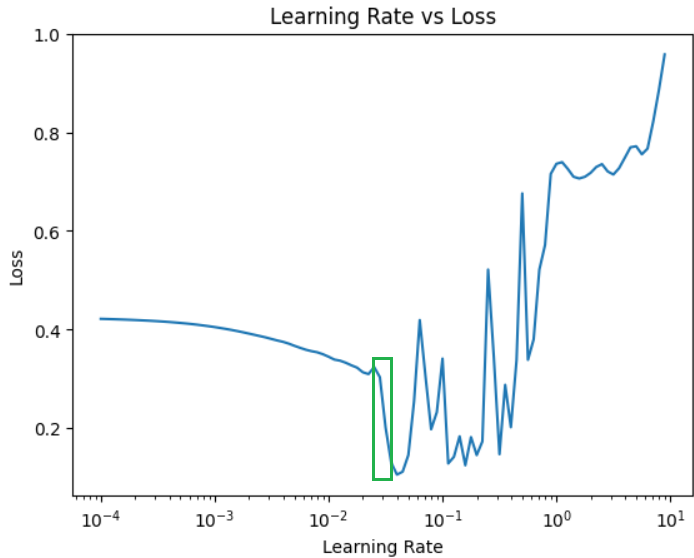